In [2]:
import numpy as np
import pandas as pd

In [3]:
cd C:\Users\SaquibRahman\Downloads\coach\Python\Data

C:\Users\SaquibRahman\Downloads\coach\Python\Data


In [4]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [5]:
temp_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df= temp_df[:12000]

In [7]:
df.shape

(12000, 2)

In [8]:
df.sentiment[10]

'negative'

In [9]:
df.sentiment.value_counts()

negative    6038
positive    5962
Name: sentiment, dtype: int64

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.duplicated().sum()

23

In [12]:
df.drop_duplicates(inplace = True)

C:\Users\SaquibRahman\AppData\Local\Temp\ipykernel_28684\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [13]:
df.duplicated().sum()

0

## Basic preprocessing!

In [14]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [15]:
df['review']= df['review'].apply(remove_tags)

C:\Users\SaquibRahman\AppData\Local\Temp\ipykernel_28684\2481112250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']= df['review'].apply(remove_tags)


In [16]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
11995,This is the Columbo that got directed by Steve...,positive
11996,This movie had me smiling from beginning to en...,positive
11997,In the title I write that the story is ludicro...,negative
11998,This has to be one of the best movies we have ...,positive


In [17]:
df['review'].dtype

dtype('O')

In [18]:
df['review']=df['review'].astype(str).apply(lambda x: x.lower())
# df['review_lower'] = df['review'].apply(lambda x : x.lower())


C:\Users\SaquibRahman\AppData\Local\Temp\ipykernel_28684\4261082180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].astype(str).apply(lambda x: x.lower())


In [19]:
# df['review'] = df['review'].astype(str)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
11995,this is the columbo that got directed by steve...,positive
11996,this movie had me smiling from beginning to en...,positive
11997,in the title i write that the story is ludicro...,negative
11998,this has to be one of the best movies we have ...,positive


In [20]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

C:\Users\SaquibRahman\AppData\Local\Temp\ipykernel_28684\2826946130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [21]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
11995,columbo got directed steven spielberg early po...,positive
11996,"movie smiling beginning end, partly humor, par...",positive
11997,title write story ludicrous. i'll elaborate te...,negative
11998,one best movies seen highly recommend exposure...,positive


In [22]:
df['review'][10]

'phil alien one quirky films humour based around oddness everything rather actual punchlines.at first odd pretty funny movie progressed find jokes oddness funny anymore.its low budget film (thats never problem itself), pretty interesting characters, eventually lost interest.i imagine film would appeal stoner currently partaking.for something similar better try "brother another planet"'

In [79]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [80]:
X

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
11995,columbo got directed steven spielberg early po...
11996,"movie smiling beginning end, partly humor, par..."
11997,title write story ludicrous. i'll elaborate te...
11998,one best movies seen highly recommend exposure...


In [81]:
# df.iloc[lambda x: x.index % 2 == 0]

In [82]:
# df_x = df.iloc[:, 0:1]

In [83]:
# df_x

In [84]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
11995    positive
11996    positive
11997    negative
11998    positive
11999    negative
Name: sentiment, Length: 11977, dtype: object

In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [86]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)


In [88]:
X_train

,review
5731,"upon straight story release 1999, praised davi..."
3118,"korean cinema ability turn genres head, latest..."
5829,"""north & south"" television mini-series 80's ""r..."
1112,watched movie bravo! absolutely horrible. plot...
11004,saw movie september mother. expecting good mov...
...,...
11986,strange relationship middle-aged woman transse...
5194,movie look feel put together matter days-kind ...
5393,total crap.i kind excited see film version see...
860,production quite surprise me. absolutely love ...


## tokenisation

In [89]:
#  Applying BOW

from sklearn.feature_extraction.text import CountVectorizer

In [94]:
cv = CountVectorizer()
cv

CountVectorizer()

In [91]:
# raw_documents = X_train

In [92]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [97]:
X_train_bow.shape

(9581, 52599)

In [106]:
X_test_bow.shape

(2396, 52599)

In [110]:
X_train[:5]

,review
5731,"upon straight story release 1999, praised davi..."
3118,"korean cinema ability turn genres head, latest..."
5829,"""north & south"" television mini-series 80's ""r..."
1112,watched movie bravo! absolutely horrible. plot...
11004,saw movie september mother. expecting good mov...


In [107]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
X_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Gaussian Naive Bayes!

In [99]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow, y_train)

GaussianNB()

In [102]:
# training accuracy!!

y_pred = gnb.predict(X_train_bow)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_train, y_pred)

0.9295480638764221

In [115]:
#testing accuracy

y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.6381469115191987

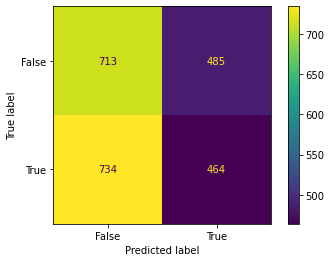

In [126]:
from sklearn import metrics
import matplotlib.pyplot as plt


confusion_matrix = metrics.confusion_matrix(y_train[:2396], y_pred)  ## shape of training data doesnot match with y predicted data

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [125]:
y_train[:2396].shape

(2396,)

In [122]:
y_pred.shape

(2396,)

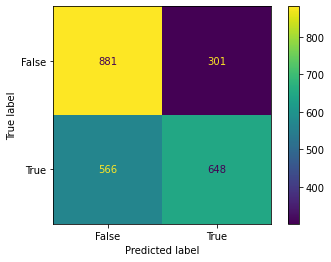

In [120]:
from sklearn import metrics
import matplotlib.pyplot as plt


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Random Forest Classifier!

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)

accuracy_score(y_test, y_pred)

0.8380634390651085

In [129]:
cv = CountVectorizer(ngram_range = (1,2), max_features = 5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8480801335559266

In [130]:
cv = CountVectorizer(ngram_range = (1,3), max_features = 5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.845575959933222

In [131]:
cv = CountVectorizer(ngram_range = (1,2), max_features = 10000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8459933222036727

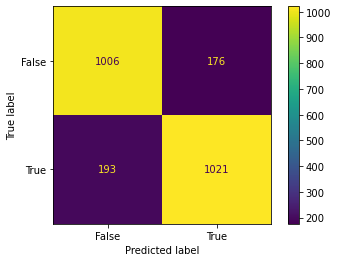

In [132]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### TFIDF

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [134]:
tfidf = TfidfVectorizer()

In [135]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()

In [136]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test, y_pred)

0.8430717863105175

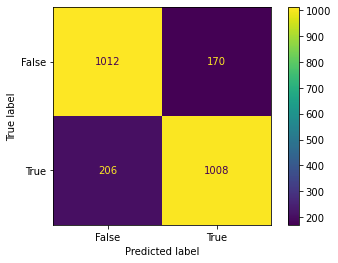

In [137]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### word2vec

In [139]:
import gensim

In [150]:
from gensim.models import Word2Vec, KeyedVectors

In [152]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True,limit=500000)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'